In [33]:
import pandas as pd 
import requests
import os
import numpy as np

df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_twitter_copy = df_twitter.copy(deep = True)

In [4]:
print (df_twitter_copy.info())
print (df_twitter_copy.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# Quality

## Define
Columns - Not enough data to work with.

1) in_reply_to_status_id and in_reply_to_user_id.

2) retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. 

3) timestamp data is object, not datetime.

## Clean
1) Use drop function to remove columns from Data Frame.

2) Use drop function to remove columns from Data Frame.

3) Use pandas to_datetime to convert to datetime data.

In [5]:
df_twitter_cleaned = df_twitter_copy.drop(df_twitter_copy.columns[[1, 2, 6, 7, 8]], axis=1)

In [6]:
df_twitter_cleaned['timestamp']= pd.to_datetime(df_twitter_cleaned['timestamp'])

In [7]:
df_twitter_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_twitter_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 147.3+ KB


### The Twitter Archive file had some columns that were completely unnecessary for the project, so they were removed.

In [9]:
df_twitter_cleaned.rating_numerator.mean()

13.12648556876061

In [10]:
print(df_twitter_cleaned.rating_numerator.value_counts())
print(df_twitter_cleaned.rating_denominator.value_counts())

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64
10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


# Quality

## Define
4) Unrealistic numerator values in rating_numerator. 

5) Unrealistic denominator values, should be 10 in rating_denominator.

## Clean
4) In rating_numerator replace values above 20 with mean value of rating_numerator. 

5) In rating_denominator replace all values that are not 10 with 10.

In [11]:
df_twitter_cleaned.loc[df_twitter_cleaned['rating_numerator'] > 20, 'rating_numerator'] = np.around(df_twitter_cleaned.rating_numerator.mean(), decimals=0)

In [12]:
df_twitter_cleaned.loc[df_twitter_cleaned['rating_denominator'] != 10, 'rating_denominator'] = 10

In [13]:
print(df_twitter_cleaned.rating_numerator.value_counts())
print(df_twitter_cleaned.rating_denominator.value_counts())

12.0    558
11.0    464
10.0    461
13.0    375
9.0     158
8.0     102
7.0      55
14.0     54
5.0      37
6.0      32
3.0      19
4.0      17
2.0       9
1.0       9
0.0       2
15.0      2
17.0      1
20.0      1
Name: rating_numerator, dtype: int64
10    2356
Name: rating_denominator, dtype: int64


### The rating numerators and rating denominators,  as well as the dog names had invalid data so they were cleaned up

In [14]:
df_twitter_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 147.3+ KB


In [15]:
df_twitter_cleaned[df_twitter_cleaned['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12.0,10,None,None,None,None,None
55,881633300179243008,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17.0,10,None,None,None,None,None
64,879674319642796034,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14.0,10,None,None,None,None,None
113,870726314365509632,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10.0,10,None,None,None,None,None
148,863427515083354112,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12.0,10,None,None,None,None,None
179,857214891891077121,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,12.0,10,None,None,None,None,None
185,856330835276025856,2017-04-24 02:15:55,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,NaN,14.0,10,None,None,None,None,None
186,856288084350160898,2017-04-23 23:26:03,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14.0,10,None,None,None,None,None
188,855862651834028034,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,13.0,10,None,None,None,None,None
189,855860136149123072,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,13.0,10,None,None,None,None,None


# Quality

## Define 
6) Column expanded_urls has a few rows with NaN.

## Clean
6) Use dropna to remove those rows with no values.


In [16]:
df_twitter_cleaned = df_twitter_cleaned.dropna(subset=['expanded_urls'])

In [17]:
df_twitter_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null float64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 161.5+ KB


# Tidiness

## Define
1) The 4 dog rating types should only be 1 column.

## Clean
1) Extracted from the 4 columns and merged them into 1 new column - dog_stages.

In [18]:
df_twitter_cleaned['dog_stages'] = df_twitter_cleaned.doggo + df_twitter_cleaned.floofer + df_twitter_cleaned.pupper + df_twitter_cleaned.puppo

df_twitter_cleaned.loc[df_twitter_cleaned.dog_stages == 'NoneNoneNoneNone', 'dog_stages'] = 'None'
df_twitter_cleaned.loc[df_twitter_cleaned.dog_stages == 'NoneNonepupperNone', 'dog_stages'] = 'pupper'
df_twitter_cleaned.loc[df_twitter_cleaned.dog_stages == 'doggoNoneNoneNone', 'dog_stages'] = 'doggo'
df_twitter_cleaned.loc[df_twitter_cleaned.dog_stages == 'NoneNoneNonepuppo', 'dog_stages'] = 'puppo'
df_twitter_cleaned.loc[df_twitter_cleaned.dog_stages == 'NoneflooferNoneNone', 'dog_stages'] = 'floofer'
df_twitter_cleaned.loc[df_twitter_cleaned.dog_stages == 'doggoNonepupperNone', 'dog_stages'] = 'doggo,pupper'
df_twitter_cleaned.loc[df_twitter_cleaned.dog_stages == 'doggoflooferNoneNone', 'dog_stages'] = 'doggo,floofer'
df_twitter_cleaned.loc[df_twitter_cleaned.dog_stages == 'doggoNoneNonepuppo', 'dog_stages'] = 'doggo,puppo'


In [19]:
print(df_twitter_cleaned.dog_stages.value_counts())

print(df_twitter_cleaned.head())

None             1923
pupper            243
doggo              80
puppo              28
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stages, dtype: int64
             tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie

# Quality

## Define
7) Dog names are not valid names.
## Clean
7) Use regex to extract dog names that start with capital letters.

In [20]:
df_twitter_cleaned.name.value_counts()

None         686
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Bailey         7
an             7
Toby           7
Buddy          7
Rusty          6
Jack           6
Jax            6
Bella          6
Stanley        6
Scout          6
Dave           6
Milo           6
Koda           6
Leo            6
Oscar          6
Louis          5
            ... 
Roscoe         1
Pippin         1
Chef           1
Ronduh         1
Henry          1
Lugan          1
Geno           1
Mason          1
Emmie          1
Noosh          1
Bloo           1
Dutch          1
Stark          1
Sunshine       1
Puff           1
Kathmandu      1
Bode           1
Shiloh         1
Grizzie        1
Tove           1
Brudge         1
Maya           1
Oddie          1
Lucia          1
Millie         1
Newt           1
Mookie         1
Hector        

In [21]:
df_twitter_cleaned['name'] = df_twitter_cleaned.name.str.extract('([A-Z].+)', expand=True)

In [22]:
print(df_twitter_cleaned.name.value_counts())
print(df_twitter_cleaned.info())

None              686
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Penny              10
Tucker             10
Lola               10
Bo                  9
Winston             9
Sadie               8
Buddy               7
Bailey              7
Daisy               7
Toby                7
Koda                6
Milo                6
Scout               6
Rusty               6
Jax                 6
Stanley             6
Jack                6
Dave                6
Leo                 6
Bella               6
Oscar               6
Bentley             5
Sunny               5
George              5
Gus                 5
                 ... 
Bradley             1
Shadoe              1
Pip                 1
River               1
Al                  1
Blue                1
Brockly             1
Jaspers             1
Cermet              1
Snoopy              1
Orion               1
Lulu                1
Harrison            1
Beemo               1
Michelange

In [23]:
folder_name = 'tweet_images'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [24]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [25]:
os.listdir(folder_name)

['image-predictions.tsv']

In [28]:
df_images = pd.read_csv('image-predictions.tsv', sep='\t')
print(df_images.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB
None


In [34]:
df_images.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [35]:
df_images.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [30]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_twitter_cleaned.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        #print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            #print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
#print(end - start)
#print(fails_dict)

In [35]:
list = []
with open ('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        dict = {'tweet_id': data['id'],
               'favorite': data['favorite_count'],
                'retweet': data['retweet_count']
               }
        list.append(dict)

FileNotFoundError: [Errno 2] No such file or directory: 'tweet-json.txt'

In [29]:
df_api = pd.DataFrame(list)


In [30]:
print(df_api.info())
print(df_api.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite    2354 non-null int64
retweet     2354 non-null int64
tweet_id    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB
None
            favorite       retweet      tweet_id
count    2354.000000   2354.000000  2.354000e+03
mean     8080.968564   3164.797366  7.426978e+17
std     11814.771334   5284.770364  6.852812e+16
min         0.000000      0.000000  6.660209e+17
25%      1415.000000    624.500000  6.783975e+17
50%      3603.500000   1473.500000  7.194596e+17
75%     10122.250000   3652.000000  7.993058e+17
max    132810.000000  79515.000000  8.924206e+17


In [34]:
df_api.head(10)
#df_api.tail(10)

NameError: name 'df_api' is not defined

# Tidiness

## Define
2) Read in 3 separate files - twitter-archive-enhanced.csv; image-predictions.tsv; tweet-json.txt into 3 data frames.
## Clean
2) Use merge function to combine all 3 data frames into 1 data frame with tweet_id as key.

In [32]:
df_merge = pd.merge(df_twitter_cleaned, df_api,on='tweet_id', how='inner')
df_merge = pd.merge(df_merge, df_images,on='tweet_id', how='inner')

In [33]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null float64
rating_denominator    2073 non-null int64
name                  1972 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
dog_stages            2073 non-null object
favorite              2073 non-null int64
retweet               2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non

In [34]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null float64
rating_denominator    2073 non-null int64
name                  1972 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
dog_stages            2073 non-null object
favorite              2073 non-null int64
retweet               2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non

# Quality

## Define
8) After combining the 4 dog rating type columns, the 4 original are no longer needed.

## Clean
8) Use drop method to remove the 4 dog rating columns.

In [35]:
df_merge = df_merge.drop(df_merge.columns[[8, 9, 10, 11]], axis=1)

In [36]:
df_merge.info()
df_merge.dog_stages.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null float64
rating_denominator    2073 non-null int64
name                  1972 non-null object
dog_stages            2073 non-null object
favorite              2073 non-null int64
retweet               2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-

None             1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stages, dtype: int64

In [37]:
df_merge.head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,favorite,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### After merging the three files, the data shows a positive relationship between the favorites and the retweets.

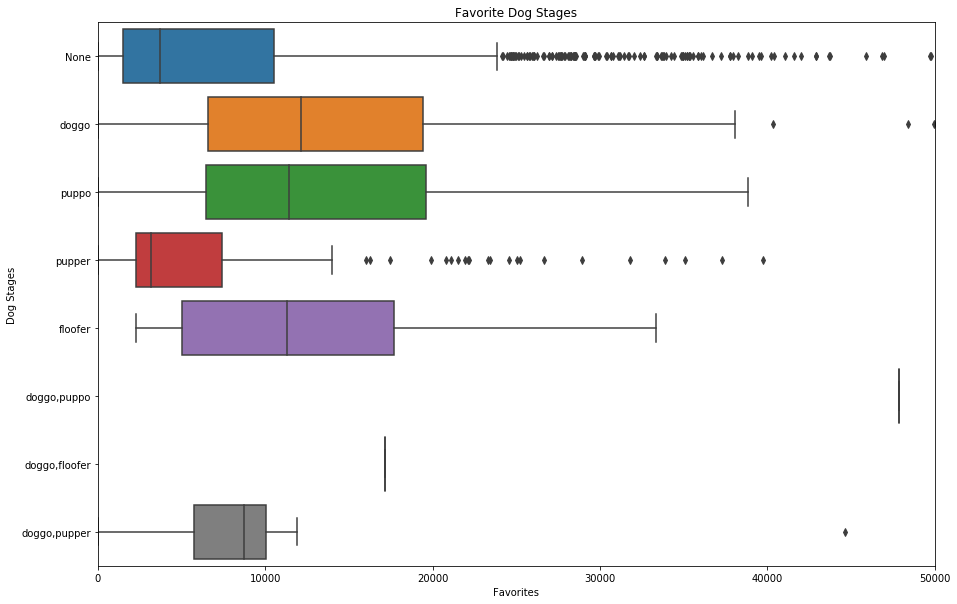

In [39]:
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline 

plt.figure(figsize = [15, 10])
sb.boxplot(data = df_merge, x = 'favorite', y = 'dog_stages');
plt.title('Favorite Dog Stages')
plt.xlabel('Favorites')
plt.ylabel('Dog Stages')
plt.xlim(0, 50000);

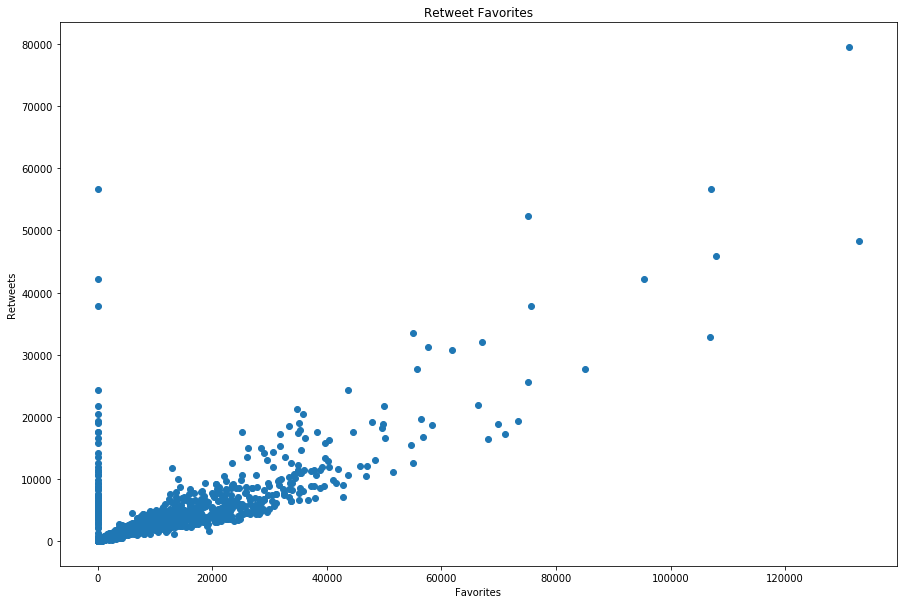

In [40]:
plt.figure(figsize=(15,10))
plt.scatter(data = df_merge, x = 'favorite', y = 'retweet')
plt.title('Retweet Favorites')
plt.xlabel('Favorites')
plt.ylabel('Retweets');

In [56]:
df_merge.to_csv('twitter_archive_master.csv', index=False)

In [41]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,favorite,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
